In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

C:\Users\vivek\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [14]:
df = pd.read_csv("C:/Study/DataScience/Jupyter_Notebook/mobile_prediction/train.csv")

In [15]:
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [16]:
df.shape

(2000, 21)

In [17]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [18]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [20]:
df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [21]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [22]:
df.var()

battery_power    1.930884e+05
blue             2.501001e-01
clock_speed      6.658629e-01
dual_sim         2.500348e-01
fc               1.884813e+01
four_g           2.496626e-01
int_memory       3.292670e+02
m_dep            8.318353e-02
mobile_wt        1.253136e+03
n_cores          5.234197e+00
pc               3.677592e+01
px_height        1.969414e+05
px_width         1.867964e+05
ram              1.176644e+06
sc_h             1.775143e+01
sc_w             1.897820e+01
talk_time        2.985481e+01
three_g          1.817086e-01
touch_screen     2.501161e-01
wifi             2.500760e-01
price_range      1.250625e+00
dtype: float64

In [23]:
df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

# Exploratory Data Analysis

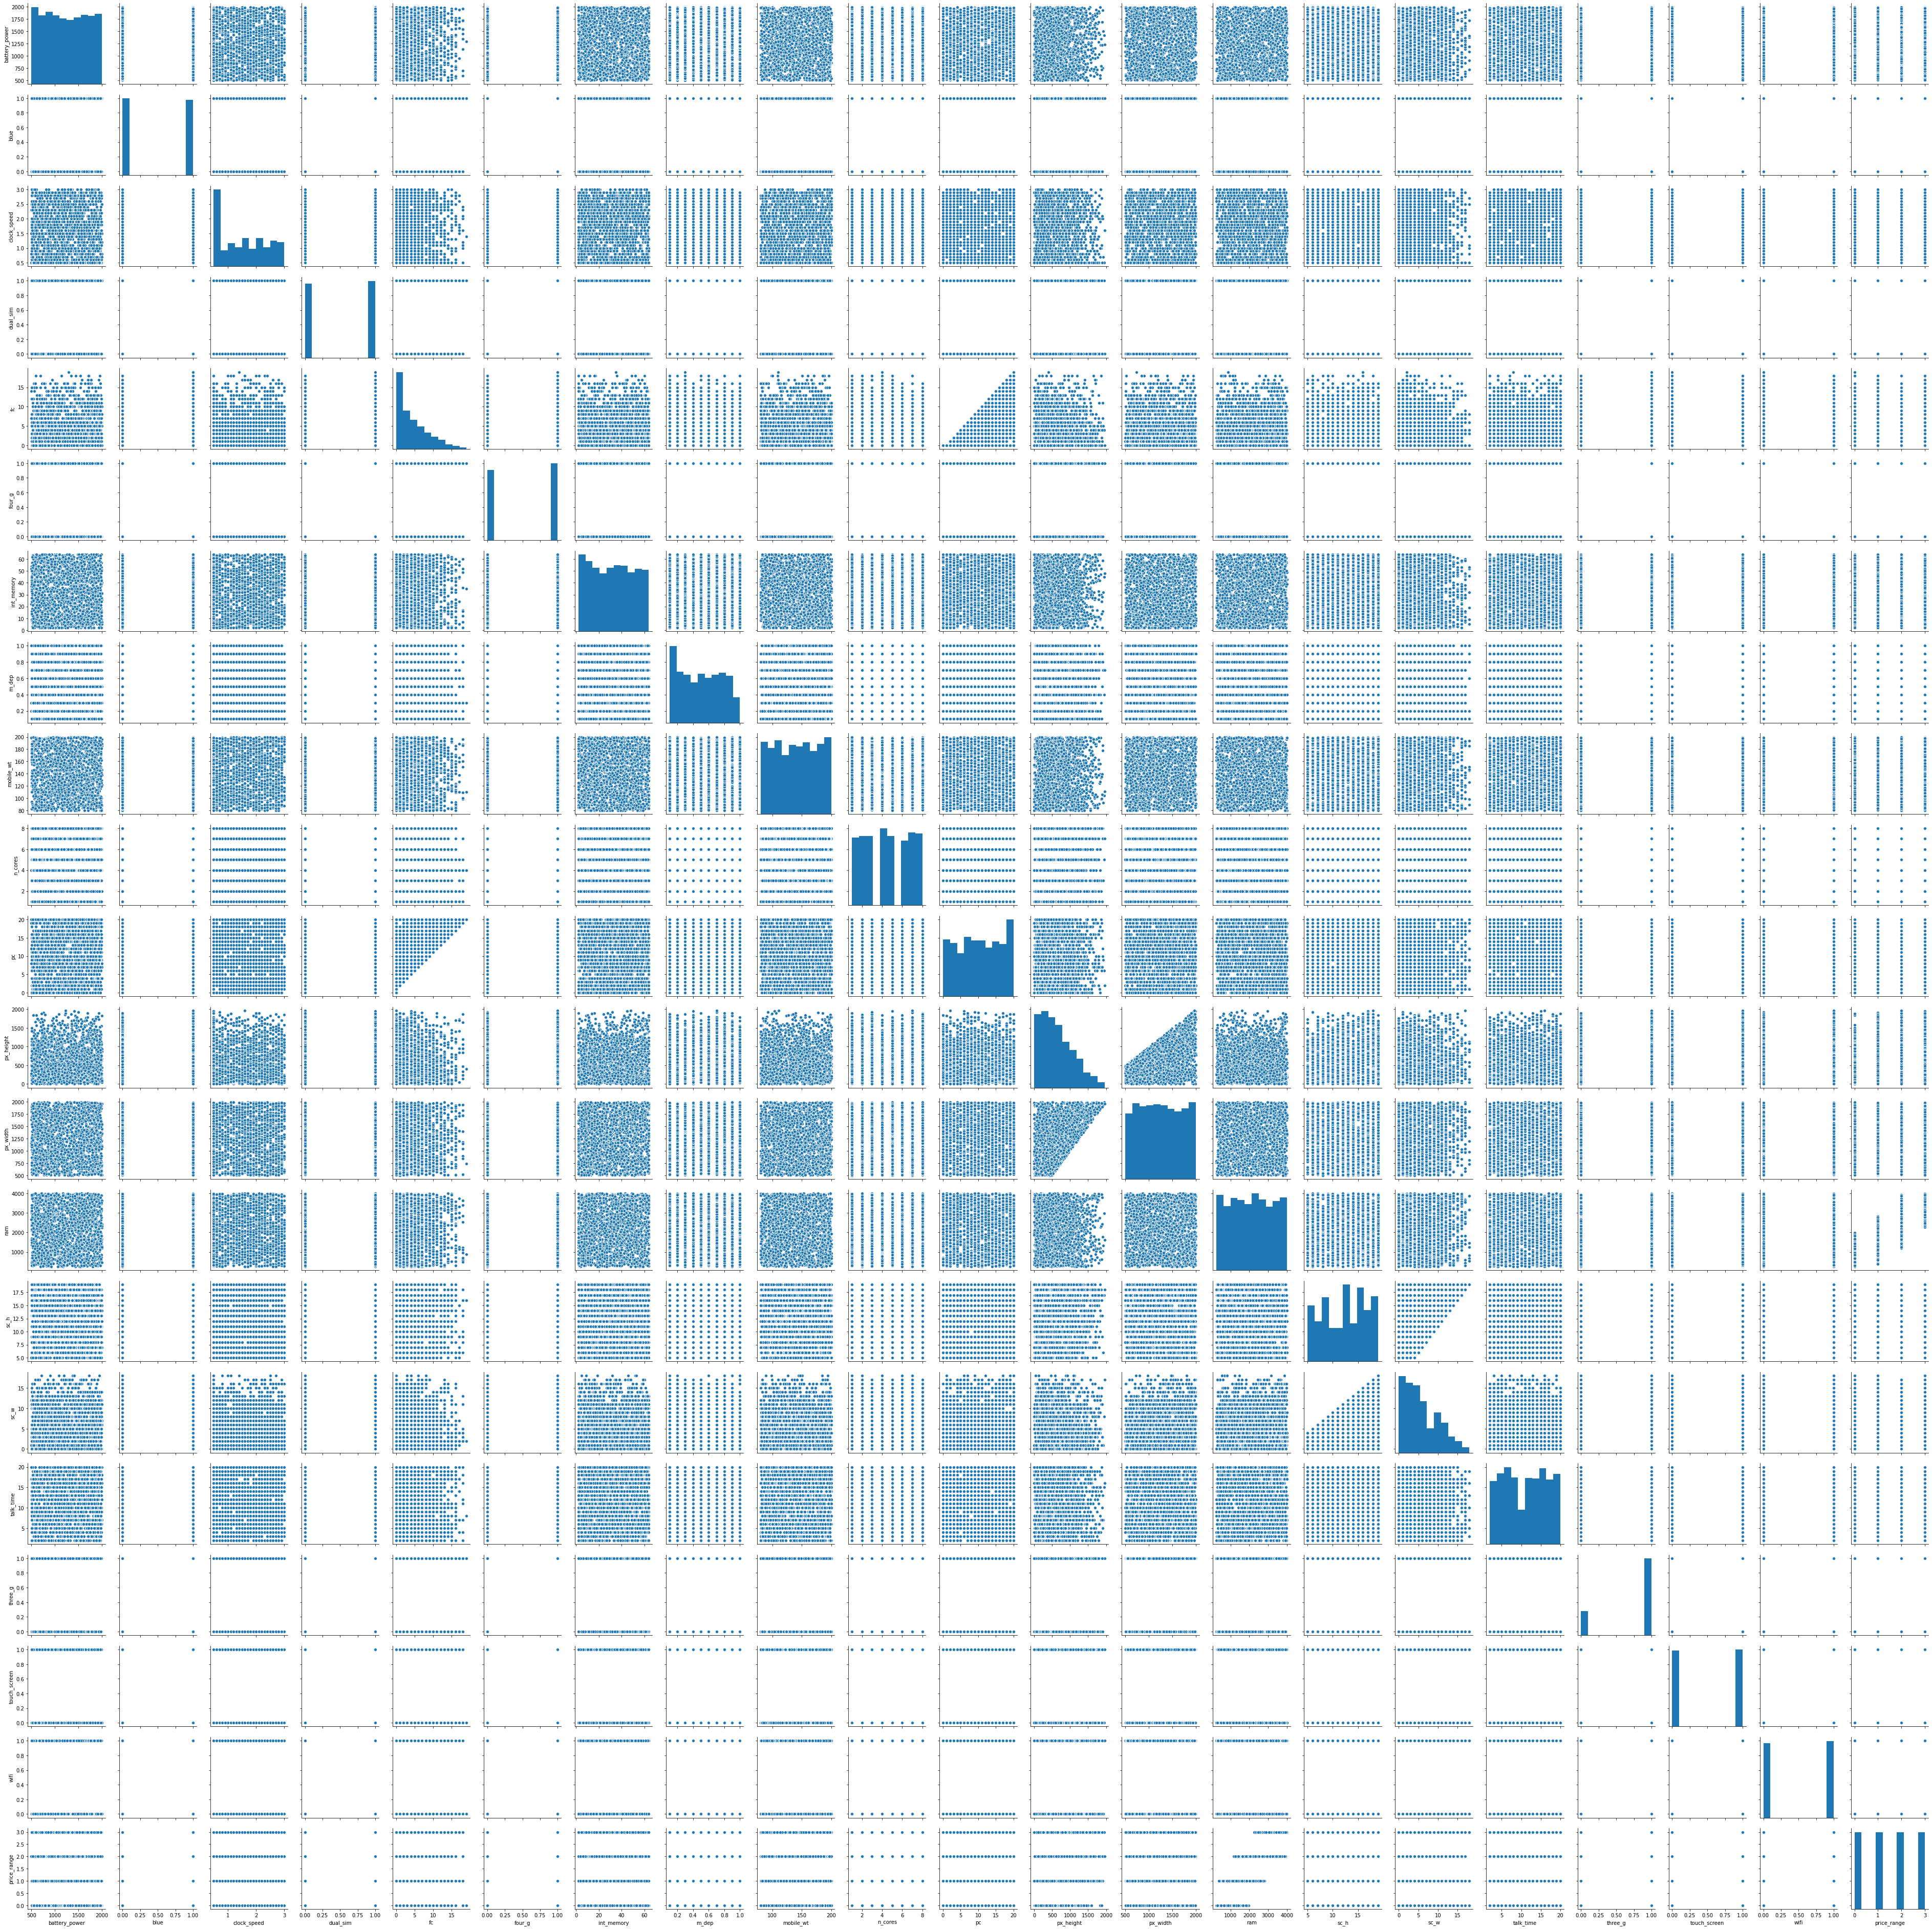

In [25]:
sns.pairplot(df)

<AxesSubplot:xlabel='price_range', ylabel='ram'>

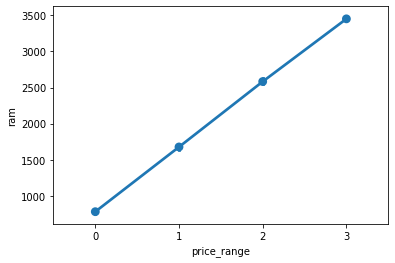

In [26]:
## Relation b/w Ram and price_range
sns.pointplot(y='ram',x='price_range',data=df)

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

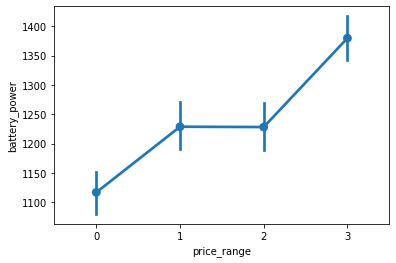

In [28]:
###Relationship b/w price_range and battery power
sns.pointplot(y='battery_power',x='price_range',data=df)

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

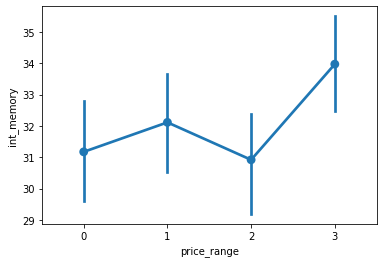

In [29]:
sns.pointplot(y='int_memory',x='price_range',data=df)


<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

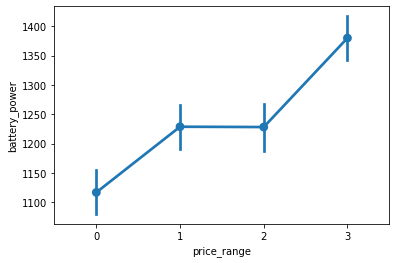

In [30]:
sns.pointplot(x='price_range',y='battery_power',data=df)

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

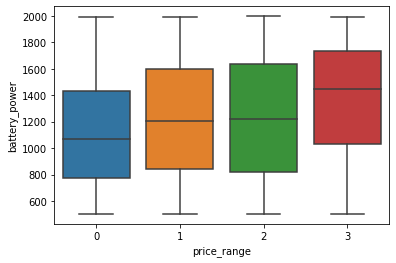

In [32]:
sns.boxplot(x='price_range',y='battery_power',data=df)

In [33]:
col = df.columns

In [35]:
col

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [36]:
categorical_col = ['blue','dual_sim','four_g','three_g','touch_screen','price_range']

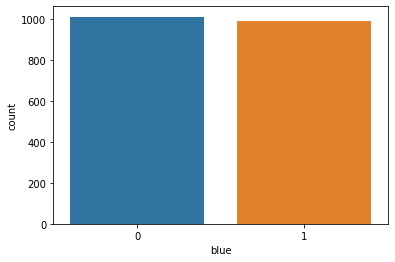

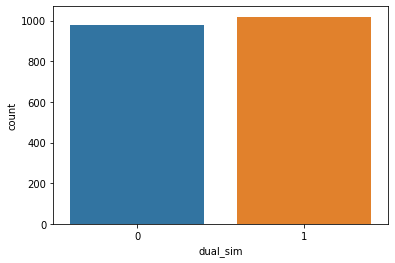

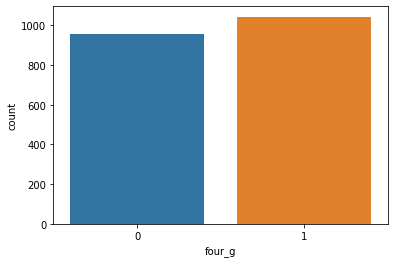

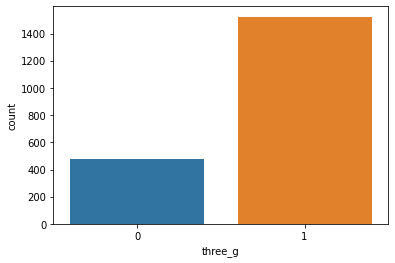

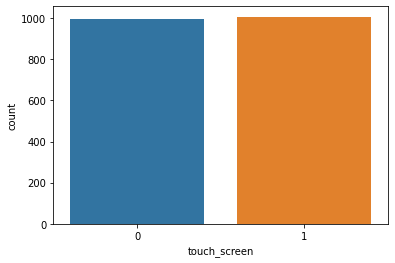

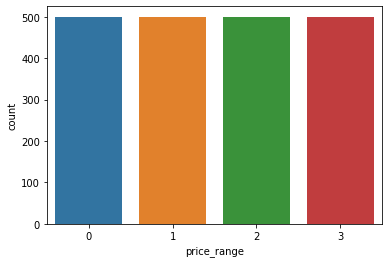

In [40]:
for i in categorical_col:
    sns.countplot(df[i])
    plt.xlabel(i)
    plt.show()

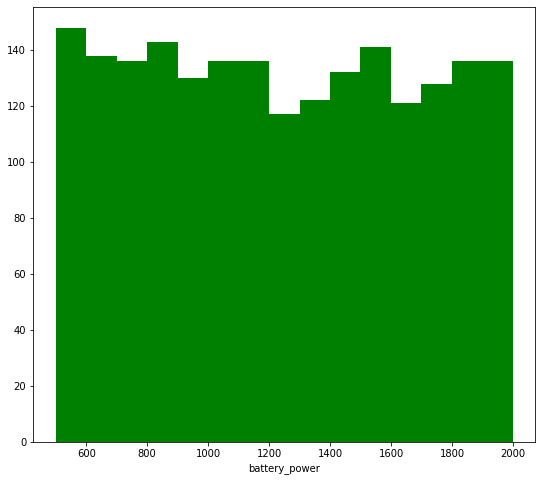

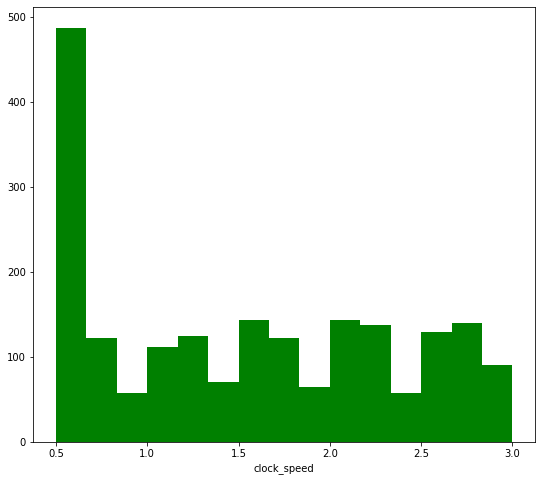

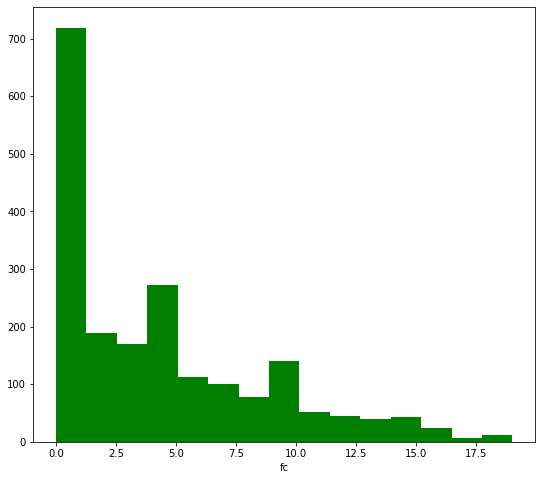

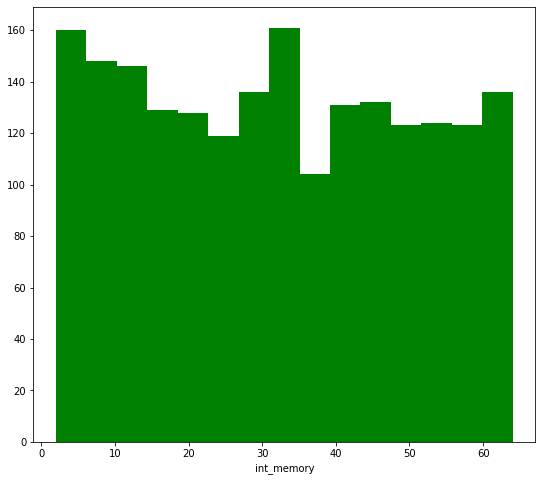

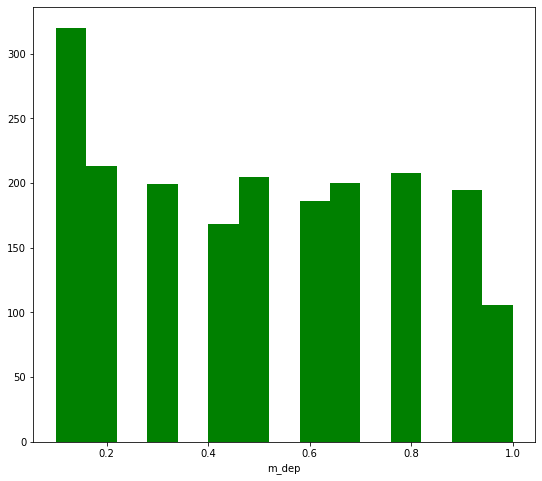

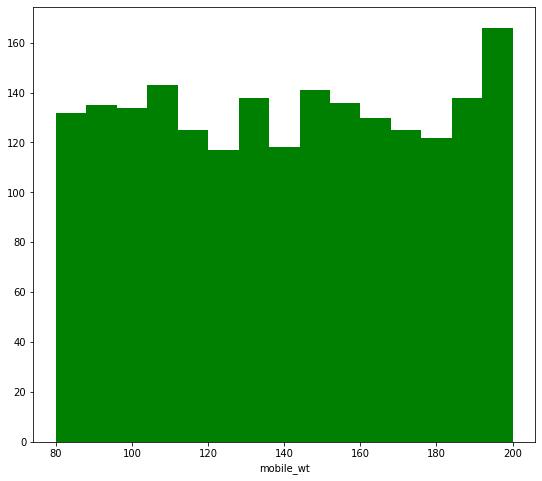

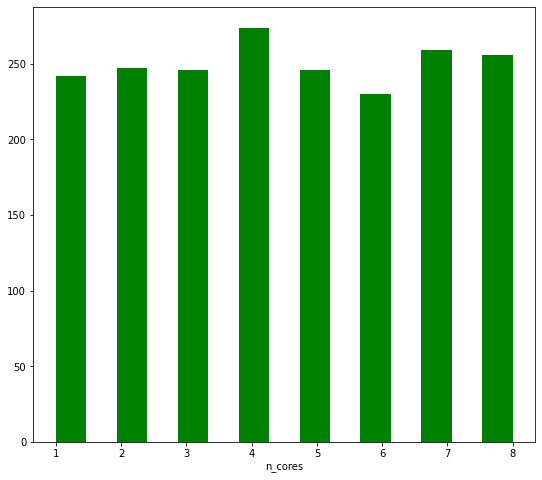

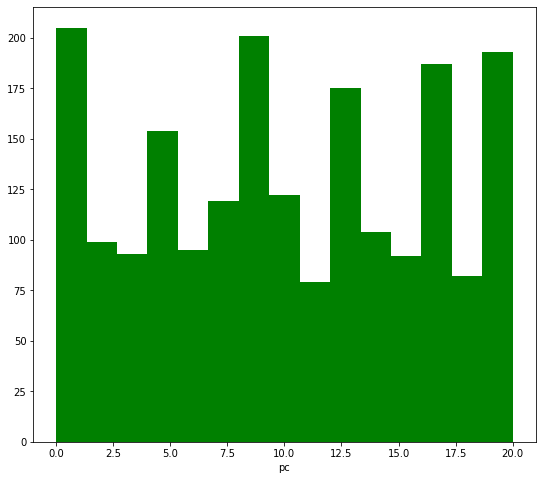

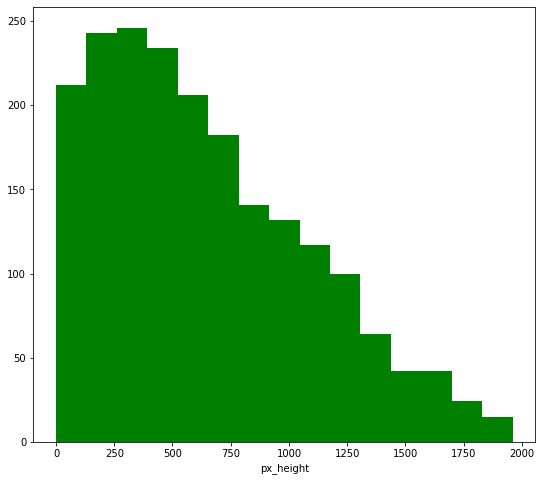

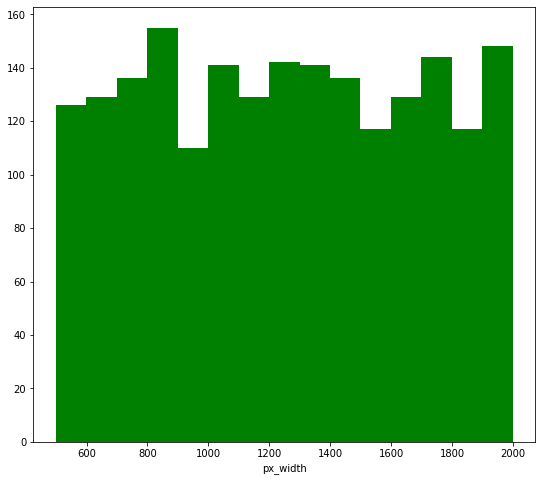

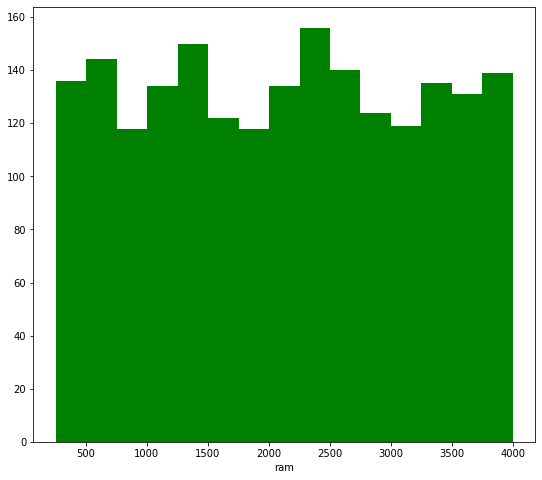

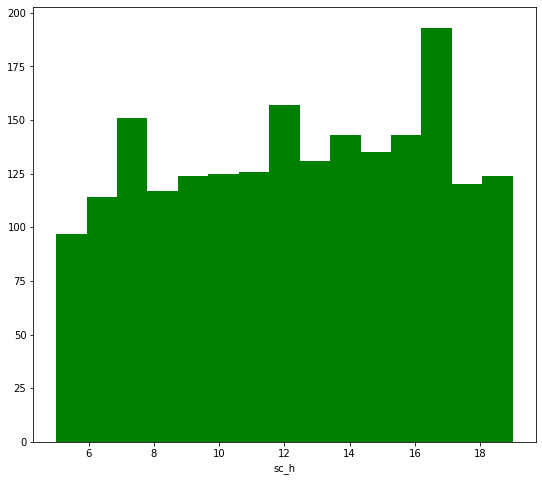

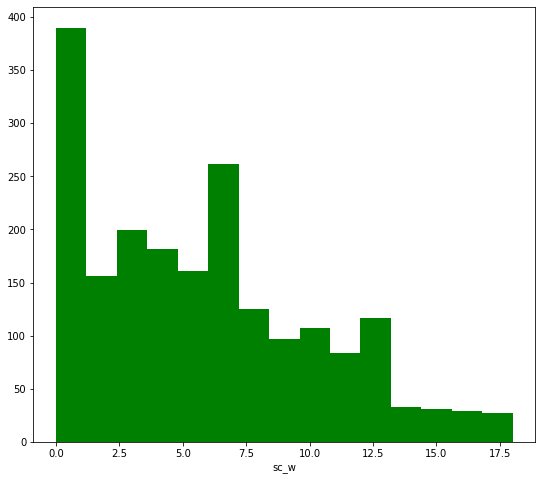

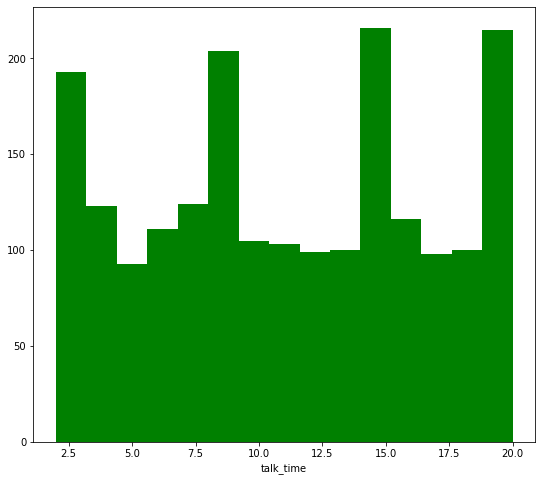

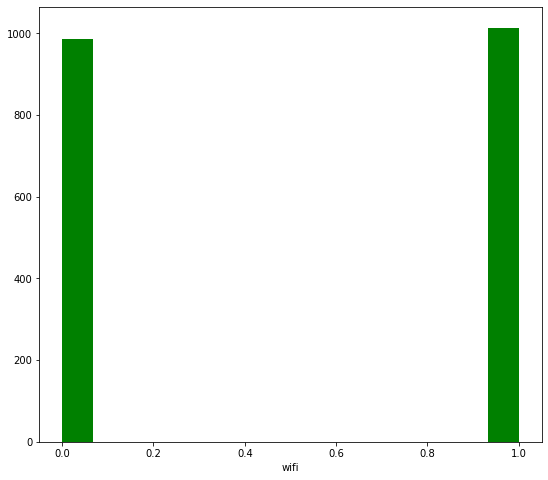

In [43]:
for i in df.drop(df[categorical_col],axis=1):
        fig = plt.figure(figsize=(9,8))
        plt.hist(df[i],color='green',bins=15)
        plt.xlabel(i)
        plt.show()

In [44]:
corr = df.corr()

In [45]:
corr

battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011252     0.011482 -0.041847  0.033334   
blue                0.011252  1.000000     0.021419  0.035198  0.003593   
clock_speed         0.011482  0.021419     1.000000 -0.001315 -0.000434   
dual_sim           -0.041847  0.035198    -0.001315  1.000000 -0.029123   
fc                  0.033334  0.003593    -0.000434 -0.029123  1.000000   
four_g              0.015665  0.013443    -0.043073  0.003187 -0.016560   
int_memory         -0.004004  0.041177     0.006545 -0.015679 -0.029133   
m_dep               0.034085  0.004049    -0.014364 -0.022142 -0.001791   
mobile_wt           0.001844 -0.008605     0.012350 -0.008979  0.023618   
n_cores            -0.029727  0.036161    -0.005724 -0.024658 -0.013356   
pc                  0.031441 -0.009952    -0.005245 -0.017143  0.644595   
px_height           0.014901 -0.006872    -0.014523 -0.020875 -0.009990   
px_width           -0.008402 -0.041533    -0.009476  0.014291 -0.005176   
ram                -0.000653  0.026351     0.003443  0.041072  0.015099   
sc_h               -0.029959 -0.002952    -0.029078 -0.011949 -0.011014   
sc_w               -0.021421  0.000613    -0.007378 -0.016666 -0.012373   
talk_time           0.052510  0.013934    -0.011432 -0.039404 -0.006829   
three_g             0.011522 -0.030236    -0.046433 -0.014008  0.001793   
touch_screen       -0.010516  0.010061     0.019756 -0.017117 -0.014828   
wifi               -0.008343 -0.021863    -0.024471  0.022740  0.020085   
price_range         0.200723  0.020573    -0.006606  0.017444  0.021998   

                 four_g  int_memory     m_dep  mobile_wt   n_cores  ...  \
battery_power  0.015665   -0.004004  0.034085   0.001844 -0.029727  ...   
blue           0.013443    0.041177  0.004049  -0.008605  0.036161  ...   
clock_speed   -0.043073    0.006545 -0.014364   0.012350 -0.005724  ...   
dual_sim       0.003187   -0.015679 -0.022142  -0.008979 -0.024658  ...   
fc            -0.016560   -0.029133 -0.001791   0.023618 -0.013356  ...   
four_g         1.000000    0.008690 -0.001823  -0.016537 -0.029706  ...   
int_memory     0.008690    1.000000  0.006886  -0.034214 -0.028310  ...   
m_dep         -0.001823    0.006886  1.000000   0.021756 -0.003504  ...   
mobile_wt     -0.016537   -0.034214  0.021756   1.000000 -0.018989  ...   
n_cores       -0.029706   -0.028310 -0.003504  -0.018989  1.000000  ...   
pc            -0.005598   -0.033273  0.026282   0.018844 -0.001193  ...   
px_height     -0.019236    0.010441  0.025263   0.000939 -0.006872  ...   
px_width       0.007448   -0.008335  0.023566   0.000090  0.024480  ...   
ram            0.007313    0.032813 -0.009434  -0.002581  0.004868  ...   
sc_h           0.027166    0.037771 -0.025348  -0.033855 -0.000315  ...   
sc_w           0.037005    0.011731 -0.018388  -0.020761  0.025826  ...   
talk_time     -0.046628   -0.002790  0.017003   0.006209  0.013148  ...   
three_g        0.584246   -0.009366 -0.012065   0.001551 -0.014733  ...   
touch_screen   0.016758   -0.026999 -0.002638  -0.014368  0.023774  ...   
wifi          -0.017620    0.006993 -0.028353  -0.000409 -0.009964  ...   
price_range    0.014772    0.044435  0.000853  -0.030302  0.004399  ...   

               px_height  px_width       ram      sc_h      sc_w  talk_time  \
battery_power   0.014901 -0.008402 -0.000653 -0.029959 -0.021421   0.052510   
blue           -0.006872 -0.041533  0.026351 -0.002952  0.000613   0.013934   
clock_speed    -0.014523 -0.009476  0.003443 -0.029078 -0.007378  -0.011432   
dual_sim       -0.020875  0.014291  0.041072 -0.011949 -0.016666  -0.039404   
fc             -0.009990 -0.005176  0.015099 -0.011014 -0.012373  -0.006829   
four_g         -0.019236  0.007448  0.007313  0.027166  0.037005  -0.046628   
int_memory      0.010441 -0.008335  0.032813  0.037771  0.011731  -0.002790   
m_dep           0.025263  0.023566 -0.009434 -0.025348 -0.018388   0.017003   
mo

<AxesSubplot:>

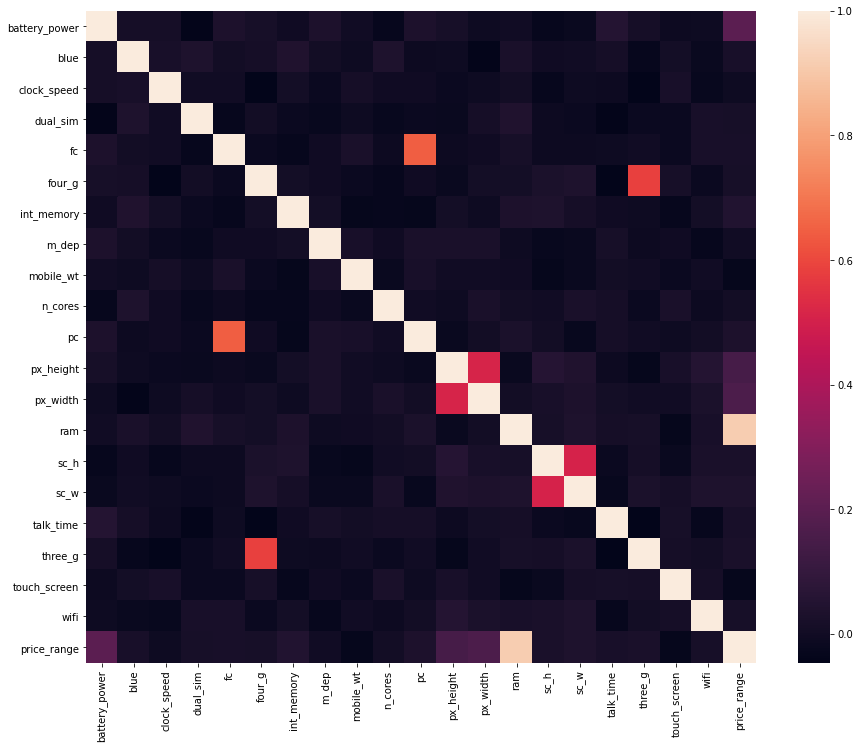

In [47]:
fig = plt.figure(figsize=(15,12))
sns.heatmap(corr)

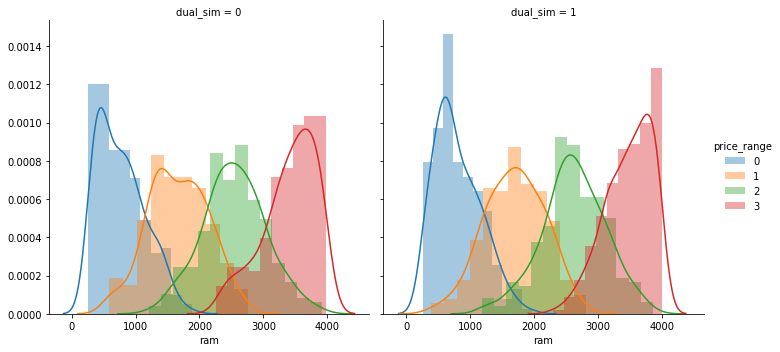

In [49]:
h = sns.FacetGrid(df,col = "dual_sim",hue="price_range",height=5)
h = (h.map(sns.distplot,"ram").add_legend())

In [50]:
x = df.drop('price_range',axis=1)
y = df['price_range']

In [52]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [54]:
scaler = StandardScaler()
scaled = scaler.fit_transform(x)

In [57]:
scaled

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
vif['features']=x.columns
vif

vif       features
0   1.009945  battery_power
1   1.011342           blue
2   1.006025    clock_speed
3   1.011555       dual_sim
4   1.718987             fc
5   1.528509         four_g
6   1.009274     int_memory
7   1.006385          m_dep
8   1.004548      mobile_wt
9   1.008442        n_cores
10  1.720785             pc
11  1.369052      px_height
12  1.362399       px_width
13  1.008331            ram
14  1.356109           sc_h
15  1.353648           sc_w
16  1.010502      talk_time
17  1.527367        three_g
18  1.006278   touch_screen
19  1.009100           wifi

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=123,stratify=y)

# Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

lr = LogisticRegression(solver='liblinear')
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
y_test_pred = lr.predict(x_test)

In [67]:
y_test_pred

array([1, 3, 2, 0, 3, 1, 1, 0, 3, 1, 2, 3, 2, 3, 0, 1, 1, 1, 2, 1, 2, 3,
       1, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 3, 1, 3, 0, 3, 1, 1, 2, 0, 0, 3,
       0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 3, 3, 2, 2, 3, 0, 2, 0, 0, 3, 1, 1,
       2, 0, 3, 0, 0, 1, 1, 3, 1, 3, 2, 2, 3, 1, 3, 1, 3, 3, 3, 1, 0, 0,
       0, 2, 1, 3, 1, 1, 0, 3, 3, 3, 3, 1, 2, 3, 0, 0, 3, 3, 1, 3, 3, 3,
       0, 3, 1, 0, 0, 3, 1, 2, 0, 3, 3, 2, 3, 1, 1, 2, 1, 0, 0, 3, 0, 1,
       0, 2, 3, 0, 1, 3, 2, 3, 2, 0, 1, 1, 0, 3, 2, 2, 3, 3, 3, 1, 1, 0,
       0, 2, 0, 2, 2, 3, 1, 0, 1, 3, 2, 2, 0, 0, 2, 2, 3, 0, 3, 2, 3, 0,
       1, 2, 2, 2, 0, 0, 2, 1, 3, 2, 0, 1, 0, 3, 3, 0, 3, 1, 1, 3, 3, 3,
       0, 3, 2, 1, 1, 1, 1, 2, 0, 3, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 3,
       0, 3, 1, 2, 1, 0, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 2, 2, 1, 0, 1,
       3, 1, 1, 3, 0, 3, 1, 0, 0, 2, 1, 3, 0, 1, 0, 0, 2, 1, 1, 3, 3, 3,
       1, 1, 2, 1, 0, 3, 2, 0, 0, 2, 0, 2, 3, 0, 0, 0, 1, 3, 3, 1, 1, 1,
       3, 3, 3, 2, 1, 3, 2, 1, 2, 1, 3, 3, 3, 1, 2,

In [68]:
y_train_pred = lr.predict(x_train)

In [69]:
y_train_pred

array([3, 2, 0, ..., 0, 1, 3], dtype=int64)

In [70]:
lr_acc = accuracy_score(y_test_pred,y_test)

In [71]:
lr_acc

0.744

In [75]:
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))

Train Set Accuracy:79.60000000000001
Test Set Accuracy:74.4

Confusion Matrix:
[[112  16   0   0]
 [ 10  74  37   0]
 [  3  35  64   3]
 [  0   0  24 122]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       128
           1       0.59      0.61      0.60       121
           2       0.51      0.61      0.56       105
           3       0.98      0.84      0.90       146

    accuracy                           0.74       500
   macro avg       0.74      0.73      0.74       500
weighted avg       0.77      0.74      0.75       500

